In [19]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

In [20]:
img = cv2.imread("punchline.png")

template = cv2.imread("template.png")

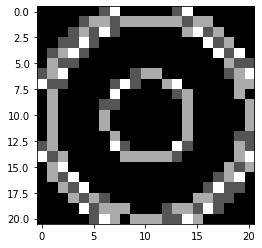

In [21]:
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.blur(template,(2,2))
template = cv2.Canny(template, 50, 200)
template = imutils.resize(template, width = int(template.shape[1] * 0.5))
(tH, tW) = template.shape[:2]
plt.imshow(template,cmap="gray")

In [22]:
rects = []
def multiscale_template_match(image, template):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.blur(gray,(3,3))
    gray = cv2.Canny(gray,50,200)
    
    found = None
    for scale in np.linspace(0.2, 1, 20)[::-1]:
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])
        # if the resized image is smaller than the template, then break
        # from the loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
    rects.append((startX, startY, endX, endY))
    
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), -1)
    # plt.figure()
    # plt.imshow(image)
    if found is not None:
        return True,clone
    else: return False,clone

In [23]:
clone = img.copy()
clone2 = img.copy()
# bool = True
# while(True):
#   bool = multiscale_template_match(clone,template)
#   print(bool)
#   if bool:
#     break
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)
multiscale_template_match(clone,template)

pick = non_max_suppression(np.array(rects))
for (startX, startY, endX, endY) in pick:
    cv2.rectangle(clone2, (startX, startY), (endX, endY),(0, 0, 255),5)
		



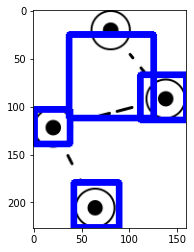

In [24]:
plt.imshow(clone2)